In [1]:
import Motoresdecombustioninterna as th

## DEFINICIÓN DE VALORES

In [3]:
t1=288 #K
nc=0.87 #Eficiencia de compresor
ntg=0.89 #Eficiencia de turbina de gas
ntp=0.89 #Eficiencia de turbina de potencia
rp=12
t3=1400 #K
p1=101.3 #Kpa
p5=101.3 #Kpa

## VALORES A BUSCAR

a)La presión y la temperatura a la salida de la turbina generadora de gas.

AKA. p4 y t4

b)El trabajo neto, el calor agregado y la eficiencia térmica del ciclo, suponiendo que
no hay caída de presión durante el proceso de adición del calor y que la presión
en la salida de la turbina de potencia es de 101.3 kPa

AKA. wneto, qsum, nt, suponer que p2=p3, p5=101.3kPa

c) El trabajo neto, el calor agregado y la eficiencia térmica del ciclo, si hay una caída
del 3% en la cámara de combustión y la presión a la salida de la turbina de poten-
cia es del 1% por encima de la presión de entrada al compresor.

AKA. wneto,qsum,nt, suponer que p3=0.97p2, p5=1.01p1

# Interpolaciones
La función para interpolar puede ser escrito con

th.TemperaturaSI(temperaturabuscada)

In [4]:
th.TemperaturaSI(t1)

,Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K),Pr
Temperatura(K),,,,
280.0,29.0890,-646.10,192.1720,1.09140
288.0,29.0938,-413.38,192.9888,1.20548
290.0,29.0950,-355.20,193.1930,1.23400


In [5]:
th.TemperaturaSI(t3)

,Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K),Pr
Temperatura(K),,,,
1390.0,34.683,34771.7,242.006,437.6
1400.0,34.717,35128.8,242.255,450.9
1410.0,34.751,35466.1,242.502,464.5


## Valores de interpolación

In [6]:
#Cuando t1
h1=-413.38 #kJ/kmol
pr1=1.20548
#Cuando t3
h3=35128.8
pr3=450.9

# Sacar valores ideales para el punto 2

In [7]:
pr2i=th.presionRelativa(pr1=pr1,rp=rp)
pr2i

In [8]:
th.PresionRelSI(pr2i)

,Temperatura(K),Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K)
Pr,,,,
14.43100,580.000000,30.311000,8219.200000,213.639000
14.46576,580.374166,30.313432,8230.552189,213.658382
15.36000,590.000000,30.376000,8522.600000,214.157000


In [9]:
th.formulasRelacionPresiones()

In [10]:
t2i=580.374166
h2i=8230.552189

# Sacar valores reales para el punto 2

In [11]:
h2r=th.eficienciaCompresor(h1=h1,h2i=h2i, eficCompresor=nc)
h2r #Entalpia 2 real

In [12]:
th.EntalpiaSI(h2r)

,Temperatura(K),Cp(kJ/kmol*K),s(kJ/kmol*K),Pr
h(kJ/kmol),,,,
9436.80000,620.000000,30.575000,215.669000,18.422000
9522.17424,622.789096,30.593966,215.805666,18.733821
9742.90000,630.000000,30.643000,216.159000,19.540000


In [13]:
t2r=622.789096
pr2r=18.733821

# Sacar valores para el punto 4

In [14]:
#Las relaciones de presiones ya no sirven para las turbinas, solo para la compresión
#Para las turbinas de gas se usa que W_tgr=W_cr ya que las turbinas de gas sólo son para
#Ofrecer su trabajo al compresor

In [15]:
wtgr=th.trabajoCompresor(h1=h1,h2=h2r)
wtgr

In [16]:
#Podemos sacar entalpia 4 real mediante un despeje
h4r=h3-wtgr
h4r

In [17]:
#Se saca la entalpia 4 ideal para poder realizar calculos de presiones
h4i=th.eficienciaTurbinaGas(eficTurbinaGas=ntg,h3=h3,h4r=h4r)
h4i

In [18]:
#Interpolación
th.EntalpiaSI(h4i)

,Temperatura(K),Cp(kJ/kmol*K),s(kJ/kmol*K),Pr
h(kJ/kmol),,,,
23869.90000,1070.000000,33.386000,233.100000,149.910000
23965.25591,1072.854113,33.399414,233.188763,151.539698
24204.00000,1080.000000,33.433000,233.411000,155.620000


In [19]:
t4i=1072.854113
pr4i=151.539698

In [20]:
th.formulasFriccionPresiones() #Ayuda visual

In [21]:
#Se saca p2 para poder sacar p3
p2=rp*p1
p2 #KPA

In [22]:
#P3 es casi igual que p2 por lo que se puede definir como este
p3=p2

In [23]:
#Se hace un despeje de p4
p4=p3/(pr3/pr4i)
p4 #KPA

# Sacar valores reales para el punto 4

In [24]:
#Forma para poder sacar la entalpia 4 real mediante una función
h4r=th.eficienciaTurbina(h3=h3,h4i=h4i,eficTurbina=ntg)
h4r

In [25]:
th.EntalpiaSI(h4r)

,Temperatura(K),Cp(kJ/kmol*K),s(kJ/kmol*K),Pr
h(kJ/kmol),,,,
24873.60000,1100.000000,33.525000,234.025000,167.550000
25193.24576,1109.527444,33.568826,234.314634,171.589636
25209.10000,1110.000000,33.571000,234.329000,171.790000


In [26]:
t4r=1109.527444
pr4r=171.589636

# Trabajo Neto
El trabajo neto es el trabajo de la turbina de potencia

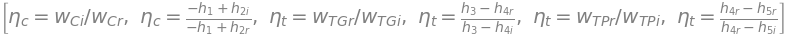

In [27]:
th.formulasFriccion()

Mediante la tabla de arriba se puede determinar que el trabajo de turbina de potencia real es h4r-h5r

Por lo que primero es necesario conseguir la entalpia 5 ideal o real, con una relación de presiones se puede conseguir el ideal

In [28]:
pr5i=pr4r/(p4/p5)
pr5i

In [29]:
#Se interpola con la presion relativa ideal 5
th.PresionRelSI(pr5i)

,Temperatura(K),Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K)
Pr,,,,
41.402000,770.000000,31.616000,14100.800000,222.402000
42.546479,775.489108,31.653875,14274.585151,222.625956
43.487000,780.000000,31.685000,14417.400000,222.810000


In [30]:
t5i=775.489108
h5i=14274.585151

In [31]:
#Ahora se consigue la entalpia 5 real
h5r=th.eficienciaTurbinaPotencia(eficTurbinaPotencia=ntp,h4r=h4r,h5i=h5i)
h5r

In [32]:
#Teniendo la entalpia 5 real se puede hacer la resta y conseguir el trabajo de turbina de potencia
wtp=th.trabajoTurbina(h3=h4r,h4=h5r)
wtp

In [33]:
#Este trabajo de turbina de potencia es igual al trabajo neto
wneto=wtp

# Calor suministrado

In [34]:
#El calor suministrado se relaciona con el punto 2 y 3
qsum=th.calorEntrada(h2=h2r,h3=h3)
qsum

# Eficiencia térmica

In [35]:
nt=th.eficienciaTermica(trabNeto=wtp,calEntrada=qsum)
nt

# INCISO A
Respuestas

In [36]:
p4

In [37]:
t4r

# INCISO B
Respuestas

In [38]:
#Trabajo neto
wneto

In [39]:
#Calor suministrado
qsum

In [40]:
#Eficiencia térmica
nt

# ---------------------------------------------------------------

# Ahora suponer que p3=0.97p2 y p5=1.01p1

In [41]:
p3=0.97*p2
p3

In [42]:
p5=1.01*p1
p5

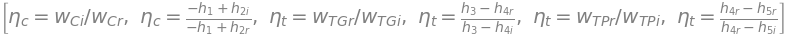

In [43]:
th.formulasFriccion() #Ayuda visual

In [44]:
th.formulasFriccionPresiones() #Ayuda visual

## Entalpia 2 ideal

In [45]:
h2i

## Entalpia 2 real

In [46]:
h2r

## Entalpia 4 ideal

In [47]:
pr4i=pr3/(p3/p4)
pr4i
#Anteriormente 171.58

In [48]:
th.PresionRelSI(pr4i)

,Temperatura(K),Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K)
Pr,,,,
155.620000,1080.00000,33.433000,24204.000000,233.411000
156.226493,1081.03145,33.437745,24238.512327,233.442769
161.500000,1090.00000,33.479000,24538.600000,233.719000


In [49]:
t4i=1081.03145
h4i=24238.512327

## Entalpia 4 real

In [50]:
h4r=th.eficienciaTurbinaGas(eficTurbinaGas=ntg,h3=h3,h4i=h4i)
h4r

## Entalpia 5 real

In [51]:
th.EntalpiaSI(h4r)

,Temperatura(K),Cp(kJ/kmol*K),s(kJ/kmol*K),Pr
h(kJ/kmol),,,,
25209.100000,1110.000000,33.571000,234.329000,171.79000
25436.443971,1116.768204,33.601457,234.532723,177.48206
25545.000000,1120.000000,33.616000,234.630000,180.20000


In [52]:
t4r=1116.768204
pr4r=177.48206

In [53]:
p4=p3/(pr3/pr4i)
p4

In [54]:
pr5i=pr4r/(p4/p5)
pr5i


In [55]:
th.PresionRelSI(pr5i)

,Temperatura(K),Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K)
Pr,,,,
43.487000,780.000000,31.685000,14417.400000,222.810000
44.447609,784.436994,31.715615,14558.097093,222.989255
45.652000,790.000000,31.754000,14734.500000,223.214000


In [56]:
h5i=14558.097093
t5i=784.436994

In [57]:
h5r=th.eficienciaTurbinaPotencia(eficTurbinaPotencia=ntp,h4r=h4r,h5i=h5i)
h5r

## Conseguir trabajo de turbina de potencia

In [58]:
wtp=th.trabajoTurbina(h3=h4r,h4=h5r)
wneto=wtp
wtp

## Conseguir el calor de entrada

In [59]:
qsum=th.calorEntrada(h2=h2r,h3=h3)
qsum

## Conseguir eficiencia termica

In [60]:
nt=th.eficienciaTermica(trabNeto=wtp,calEntrada=qsum)
nt

# INCISO C
RESPUESTAS

In [61]:
wneto #Trabajo neto

In [62]:
qsum #Calor suministrado

In [63]:
nt #Eficiencia térmica